In [31]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, expon
import random

In [32]:
# ------------- SAMPPLING CON FUNC PROBA ------------- 
def f(x):
    return x**2

def muestra_norm(e, s, rango_min=0, rango_max=3, lim=1000):
    """
    Devuelve 1000 muestras de una N(e, s), entre 0 y 3
    """
    muestra = np.random.normal(e, s, 10000)
    muestra_recortada = np.clip(muestra, rango_min, rango_max)
    return np.array(muestra_recortada[:lim])

def graph_todo(f, p, q, fp, x1, x2):
    plt.figure()
    plt.scatter(x1, f, label='f(x)')
    plt.scatter(x2, p, label='p(x)')
    plt.scatter(x2, q, label='q(x)')
    plt.scatter(x2, fp, label='f(x)p(x)')
    plt.legend()
    plt.show()
    plt.close()

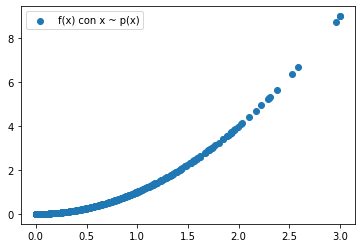

E_p[f(x)] = 0.433


In [33]:
# 1. crear muestras de f(x) a partir de x que sigure p(x) y calc su estimación de E_p[f(x)]
esp_p = 0
std_p = 1
def p(x):
    return norm.pdf(x, loc=esp_p, scale=std_p)

norms_p = muestra_norm(esp_p, std_p)
sample_p = [f(x) for x in norms_p]

plt.figure()
plt.scatter(norms_p, sample_p, label='f(x) con x ~ p(x)')
plt.legend()
plt.show()
plt.close()

print(f"E_p[f(x)] = {round(np.mean(sample_p), 3)}")

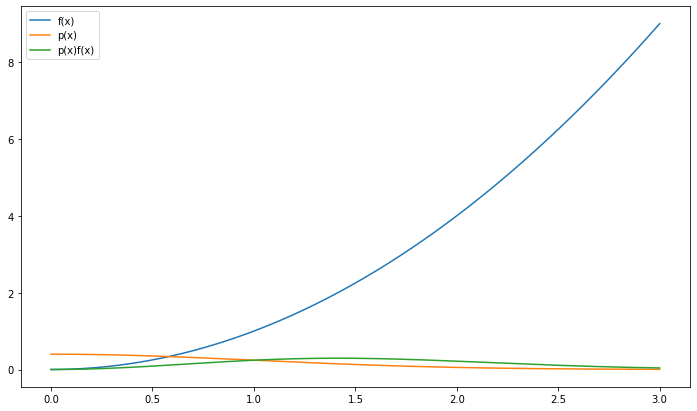

In [34]:
# 2. graficar f(x), p(x) y f(x)p(x)
x1 = np.linspace(0, 3, 1000)
p_x = [p(x) for x in x1]
f_x = [f(x) for x in x1]
pf_x = np.array(p_x)*np.array(f_x)

plt.figure(figsize=(12, 7))
plt.plot(x1, f_x, label='f(x)')
plt.plot(x1, p_x, label='p(x)')
plt.plot(x1, pf_x, label='p(x)f(x)')
plt.legend()
plt.show()
plt.close()

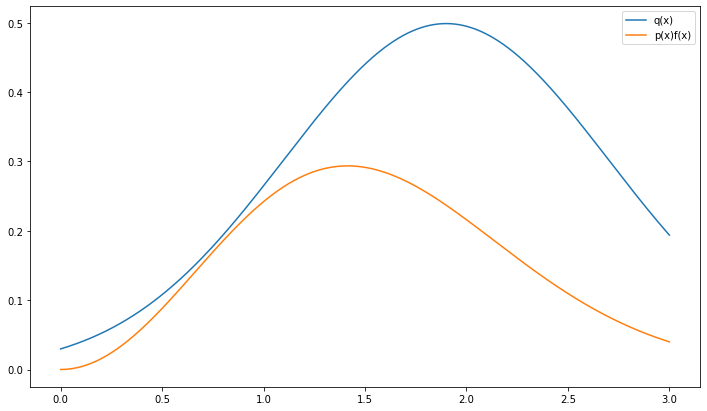

Eq[p(x)f(x)/q(x)] = 0.502


In [35]:
# 3. crear dist q(x) y samplear x con esa distribucion (q(x) > p(x)f(x))
esp_q = 1.9
std_q = 0.8

def q(x):
    return norm.pdf(x, loc=esp_q, scale=std_q)
    
q_x = [q(x) for x in x1]

#grafico q(x) vs p(x)f(x)
plt.figure(figsize=(12, 7))
plt.plot(x1, q_x, label='q(x)')
plt.plot(x1, pf_x, label='p(x)f(x)')
plt.legend()
plt.show()
plt.close()

#estimación de Eq[p(x)f(x)/q(x)]
norms_q = muestra_norm(esp_q, std_q)
sample_q = [p(x)*f(x)/q(x) for x in norms_q]
print(f"Eq[p(x)f(x)/q(x)] = {round(np.mean(sample_q), 3)}")


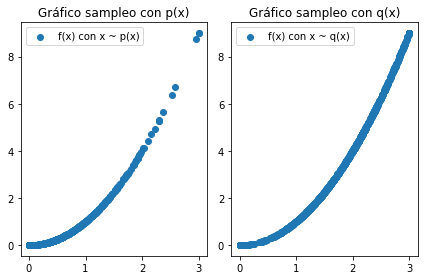

In [36]:
# 4. comparar gráfico de f(x) con x ~ p(x) vs x ~ q(x)
plt.figure()
plt.subplot(1, 2, 1) 
plt.scatter(norms_p, sample_p, label='f(x) con x ~ p(x)')
plt.title('Gráfico sampleo con p(x)')
plt.legend()

plt.subplot(1, 2, 2)  
plt.scatter(norms_q, [f(x) for x in norms_q], label='f(x) con x ~ q(x)')
plt.title('Gráfico sampleo con q(x)')
plt.legend()

plt.tight_layout()
plt.show()


In [37]:
# hacer varias veces para ver difernecia ne varianza de promedio:
prom_p = []
prom_q = []
for _ in range(30):
    norms_p = muestra_norm(esp_p, std_p)
    sample_p = [f(x) for x in norms_p]
    prom_p.append(np.mean(sample_p))

    norms_q = muestra_norm(esp_q, std_q)
    sample_q = [p(x)*f(x)/q(x) for x in norms_q]
    prom_q.append(np.mean(sample_q))

print(f"Esperanza p: {np.mean(prom_p)} \nVarianza p: {np.var(prom_p)}")
print(f"\n \nEsperanza q: {np.mean(prom_q)} \nVarianza q: {np.var(prom_q)}")
    

Esperanza p: 0.5037045814994917 
Varianza p: 0.0014342950128177691

 
Esperanza q: 0.5037192632629376 
Varianza q: 7.261597302655971e-05


In [38]:
# EJEMPLO: Calcular la probabilidad de que la v. a. con distirbución N(0, 1) sea mayor a 4 
#          (el área de la gaussiana por arriba de 4, hasta 10 porq inf no podemos)

#1. MONTECARLO (para comparar varianza desp)
def monte():
    N = 1000
    sigma = 1

    unif_x = np.random.uniform(-10, 10, N)
    unif_y = np.random.uniform(0, 1/(np.sqrt(2*np.pi)*sigma), N)

    index = np.where(unif_x >= 4)
    mont_area = 0
    for i in index[0]:
        if unif_y[i] < norm.pdf(unif_x[i], 0, 1):
            mont_area += 1

    mont_area /= N
    return mont_area

def f(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-np.square(x)/2)

def q(x, lmbda =1):
    return expon.pdf(x-4, scale=1/lmbda)

prom_p = []
prom_q = []
for _ in range(10):
    samples_x = np.random.exponential(scale=1, size=1000) + 4

    mont = monte()
    samples = [f(x)/q(x) for x in samples_x]

    prom_p.append(mont)
    prom_q.append(np.mean(samples))

print(f"Area real: {1 - norm.cdf(4)}")
print(f"monte carlo + unif --> E_p[f(x)] = {round(np.mean(prom_p), 10)} +- {np.std(prom_p)/np.sqrt(len(prom_p))}")
print(f"monte carlo + q(x) --> E_p[f(x)] = {round(np.mean(prom_q), 10)} +- {np.std(prom_q)/np.sqrt(len(prom_q))}")


Area real: 3.167124183311998e-05
monte carlo + unif --> E_p[f(x)] = 0.0 +- 0.0
monte carlo + q(x) --> E_p[f(x)] = 3.14058e-05 +- 3.539179230691751e-07
